In [1]:
import cv2
import numpy as np

from localization.localize import localize_box
from preprocessing.resize_pad import resize_and_pad

In [2]:
from PIL import Image
img_dir = "data/livecell/images/train"
img_name = "A172_Phase_A7_1_00d00h00m_1.tif"
image = Image.open(f"{img_dir}/{img_name}").convert("RGB")
image = np.array(image)

In [3]:
edges = cv2.Canny(image, 50, 150)
# cv2.imshow('Canny Edges', edges)
#cv2.imshow does not work, it will call python directly and crash your jupyter notebook kernel

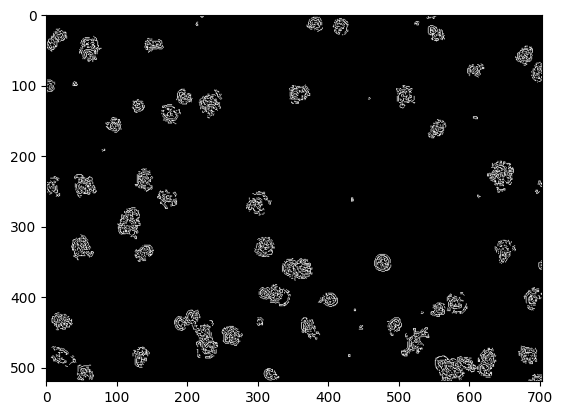

In [4]:
import matplotlib.pyplot as plt
plt.imshow(edges, cmap='gray')
plt.show()

In [5]:
image, _ = resize_and_pad(image, 1024)

In [6]:
image.shape

(1024, 1024, 3)

In [7]:
box = localize_box(image)
print('the highlighted edge coordinate is :', box)

the highlighted edge coordinate is : [np.int64(271), 0, np.int64(371), np.int64(50)]


In [8]:
from segmentation.sam_wrapper import SAMSegmenter
segmenter = SAMSegmenter(
    encoder_ckpt="sam/sam_vit_b_01ec64.pth",
    decoder_ckpt="model_registry/livecell_sam_vit_b_boxprompt/20260123_220829/mask_decoder.pt"
)

mask = segmenter.segment_with_box(image, box)

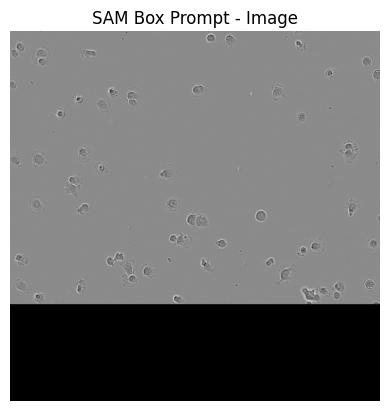

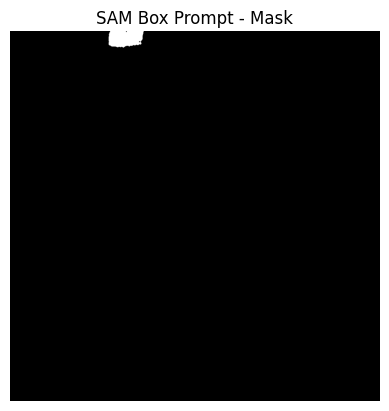

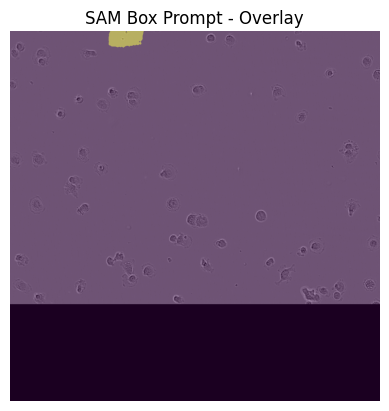

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def show_inference(image_1024, mask, title="SAM Inference"):
    """
    image_1024: (H,W) or (H,W,3)
    mask: (H,W) bool or {0,1}
    """
    if image_1024.ndim == 3:
        img = image_1024.mean(axis=2)
    else:
        img = image_1024

    mask = mask.astype(bool)

    plt.figure()
    plt.imshow(img, cmap="gray")
    plt.title(f"{title} - Image")
    plt.axis("off")

    plt.figure()
    plt.imshow(mask, cmap="gray")
    plt.title(f"{title} - Mask")
    plt.axis("off")

    plt.figure()
    plt.imshow(img, cmap="gray")
    plt.imshow(mask, alpha=0.4)
    plt.title(f"{title} - Overlay")
    plt.axis("off")

    plt.show()
    
show_inference(image, mask, title="SAM Box Prompt")

In [10]:
from measurement.geometry import measure

results = measure(mask, pixel_nm=1.0)  # replace pixel_nm when you have calibration
print(results)

{'area_nm2': np.float64(3831.0), 'width_nm': np.float64(96.0), 'height_nm': np.float64(45.0)}
